In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pyro
import pyro.distributions as dist
import torch
from scipy.stats import multivariate_normal

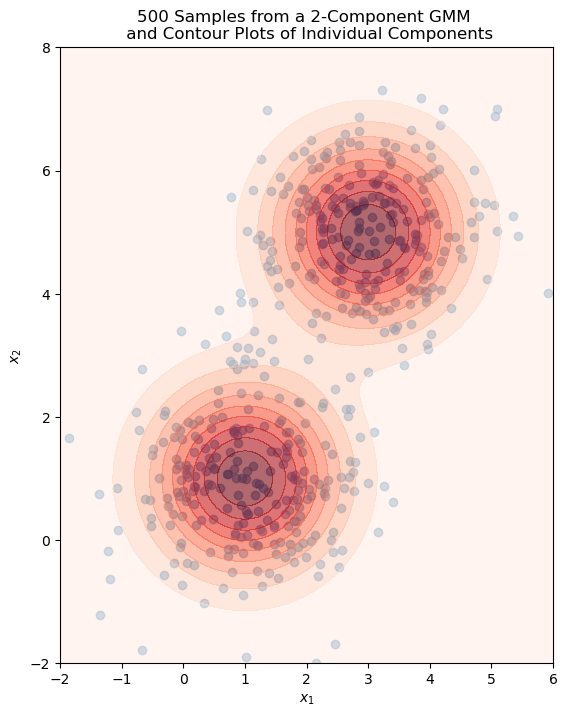

In [68]:
def model(n_samples=500):
    # Mixing probabilities
    mixing_probs = torch.tensor([0.5, 0.5])

    with pyro.plate("data", n_samples):
        w = pyro.param("w", mixing_probs)
        z = pyro.sample("z", dist.Categorical(w))

        x1 = pyro.sample("x1", dist.Normal(loc=torch.tensor([1.0, 3.0])[z], scale=1.0))
        x2 = pyro.sample("x2", dist.Normal(loc=torch.tensor([1.0, 5.0])[z], scale=1.0))

    return x1, x2


# Sample data from the model
n_samples = 500
x, y = model(n_samples)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
# Plotting the samples
ax.scatter(x, y, alpha=0.5, label="Samples from GMM")

# Define individual Gaussians for contour plots
means = np.array([[1, 1], [3, 5]])
covariances = [np.eye(2), np.eye(2)]  # Identity matrices

# Create grid for contour plots
x, y = np.mgrid[-2:6:0.01, -2:8:0.01]
pos = np.dstack((x, y))

rv1 = multivariate_normal(means[0], covariances[0])
rv2 = multivariate_normal(means[1], covariances[1])

z = 0.5 * rv1.pdf(pos) + 0.5 * rv2.pdf(pos)
ax.contourf(x, y, z, levels=10, cmap="Reds", alpha=0.6)

ax.set_title(
    "500 Samples from a 2-Component GMM \n and Contour Plots of Individual Components"
)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(xmin=-2, xmax=6)
ax.set_ylim(ymin=-2, ymax=8)
plt.show()

In [ ]:
conditioned_model = pyro.poutine.condition(model, data={"x1": 2.0})
traced_model = pyro.poutine.trace(conditioned_model)

In [72]:
trace = traced_model.get_trace()

In [73]:
trace.log_prob_sum()

ValueError: Error while computing log_prob_sum at site 'x1':
The value argument to log_prob must be a Tensor
Trace Shapes:      
 Param Sites:      
            w     2
Sample Sites:      
    data dist     |
        value 500 |
       z dist 500 |
        value 500 |
      x1 dist 500 |
        value     |


In [66]:
def model(x):
    s = pyro.param("s", torch.tensor(0.5))
    z = pyro.sample("z", dist.Normal(x, s))
    return z**2

In [67]:
conditioned_model = pyro.poutine.condition(model, data={"z": 1.0})
traced_model = pyro.poutine.trace(conditioned_model)
guide_tr = traced_model.get_trace(2)

In [63]:
guide_tr.log_prob_sum()

ValueError: Error while computing log_prob_sum at site 'z':
The value argument to log_prob must be a Tensor
Trace Shapes:  
 Param Sites:  
            s  
Sample Sites:  
       z dist |
        value |
